# Real Estate Price Prediction

The dataset 'Bengaluru_House_Data.csv'used here is downloaded from Kaggle.
The dataset has 13320 rows and 9 columns.

* First, the data is analysed and removed some unwanted features.  
* Feature Engineering - added some features.
* Oulier Detection


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

## Loading the dataset

In [2]:
data  = pd.read_csv("Bengaluru_House_Data.csv")
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Analysing the Data

In [3]:
print("The shape of the dataset is ",data.shape)

The shape of the dataset is  (13320, 9)


### Data Cleaning

**Removing the columns that are not important in predicting the price.**

In [4]:
data1 = data.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


**Checking for any null values present in the dataset**

In [5]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
data2 = data1.copy()

In [7]:
data2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
data2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Filling the missing values for the column 'bath' with the median of the given field**

In [9]:
data2['bath'] = data2['bath'].fillna(data2['bath'].median())

In [10]:
data2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [11]:
data2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**Removing the rows that has NaN values present from the remaining columns**

In [12]:
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**As the column 'size' has different values such as '4 BHK', '4 Bedroom', representing the same meaning, to avoid confusion only the numbers can be used. By splitting the tokens from the column 'size' and creating a new column 'BHK' by adding the first token from the column 'size'.**  

In [13]:
data3['BHK'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-13-ef9977352038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['BHK'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
data3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


**The column 'total_sqft' has range values and single sqft values.**

In [15]:
data3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**'is_float' function is used to check the column 'total_sqft' for the float values.**

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

**Getting the rows of data which has range values and not the float values.**

In [17]:
data3[~data3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


**The range values can be changed to single float values by taking the average of both the values.**

In [18]:
def convert_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        result = (float(tokens[0])+float(tokens[1]))/2
        return result
    try:
        return float(x)
    except:
        return None

In [19]:
convert_to_float('1804 - 2273')

2038.5

In [20]:
data3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
BHK                     4
Name: 30, dtype: object

In [21]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(convert_to_float)

In [22]:
data4

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [23]:
data4.loc[13299]

location      Whitefield
size               4 BHK
total_sqft        2856.0
bath                 5.0
price              154.5
BHK                    4
Name: 13299, dtype: object

### Feature Engineering

In [24]:
data5 = data4.copy()
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Analysing the column 'location'.**

In [25]:
data5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(data5.location.unique())

1304

In [29]:
data5.location = data5.location.apply(lambda x: x.strip())
location_stats = data5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [30]:
len(location_stats[location_stats<=10])

1052

**Separating the 1052 locations which has less than 10 data points.**

In [31]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
len(data5.location.unique())

1293

In [33]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [34]:
len(data5.location.unique())

242

## Outlier Detection

**Analysing 'total_sqft'column. Removing the data which has less than 300 total_sqft per bhk.**

In [35]:
data5[data5.total_sqft/data5.BHK<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [36]:
data5.shape

(13303, 7)

**Removing these unusual values of data by doing the '~'. The outliers like data which has more number of bedrooms with less total squarefeet has been removed.**

In [37]:
data6 = data5[~(data5.total_sqft/data5.BHK<300)]
data6.shape            

(12559, 7)

**Analysing the column 'price_per_sqft' for properties having very low price or having very high price.**

In [38]:
data6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**From the above output, the minimum value is 267 per squarefoot which is very low and the maximum value is 176470 per squarefoot which is very high. This extreme price may be because of the location of the property, but still it's an unusual value. These values can be removed**

**To remove very low and very high value data points, mean and standard deviation for price per sqft is taken per location. The price per sqft values that are higher than (mean - standard deviation) and the values that are lower than (mean + standard deviation) will be stored in the 'reduced_df'.**

In [39]:
def remove_pps_outlier(df):
    output_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        output_df = pd.concat([output_df,reduced_df],ignore_index=True)
    return output_df

data7 = remove_pps_outlier(data6)
data7.shape

(10286, 7)

In [40]:
data7.head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


**By analysing the above output it can be seen that at the same location less number of bedroom properties have higher price than the more number of bedrooms such as in '1st Phase JP Nagar' location 3BHK property cost for 1 crore and 67 lakhs but 5BHK property cost for onli 85 lakhs. This is also an outlier to be removed.**

**Using the ScatterPlot this can be visualized for different locations.**

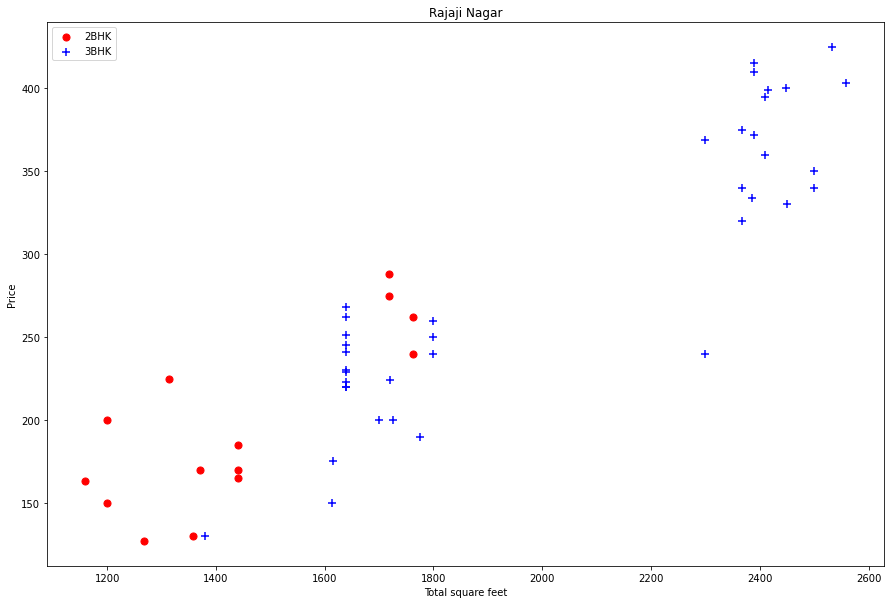

In [41]:
def scatter_plot(df,location):
    bhk_2 = df[(df.location==location) & (df.BHK==2)]
    bhk_3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk_2.total_sqft,bhk_2.price, color = 'red', label = '2BHK', s=50)
    plt.scatter(bhk_3.total_sqft,bhk_3.price, marker = '+', color = 'blue', label = '3BHK', s=50)
    plt.xlabel("Total square feet")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
scatter_plot(data7, "Rajaji Nagar")
    

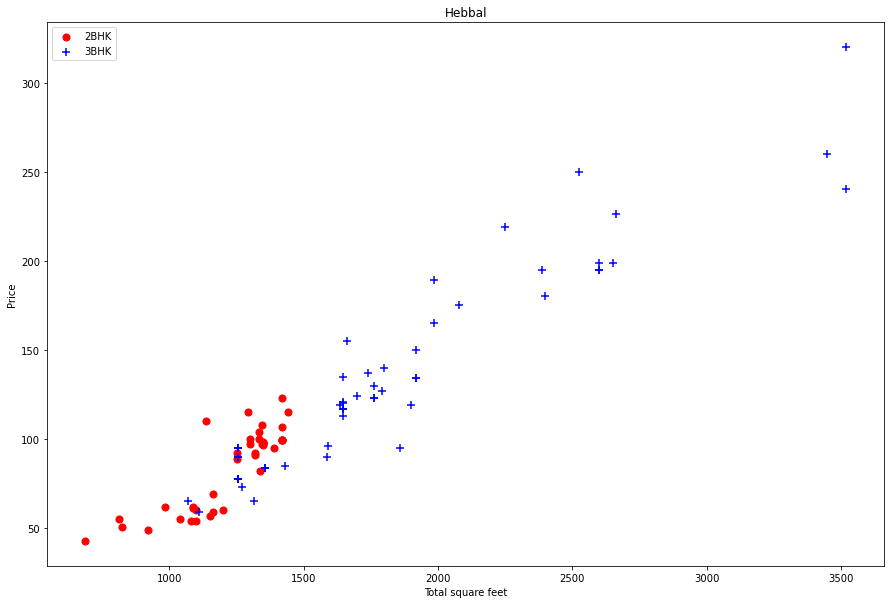

In [42]:
scatter_plot(data7, "Hebbal")

**From the above scatter plots it can be clearly seen that price for few 3BHK properties are lower than the 2BHK properties in the same location with the same square feet area. These are the outliers has to be cleaned.**

**Remove properties for the same location, where (for eg.,) 3 bedroom properties are less than the 2 bedroom properties with the same square feet area. This can be done by, for a given location, create a dictionary of statistics per BHK.**

**For example:**

{

    '1' : {
    
            'mean' : 4000,
            
            'std' : 2000,
            
            'count' : 34
            
           },
           
     '2' : {
     
             'mean' : 4300,
             
             'std' : 2300,
             
             'count' : 20
             
            }
            
}


**Now, 2BHK properties whose price_per_sqft is less than the mean of price_per_sqft of 1BHK properties can be removed.**

In [43]:
def remove_bhk_outliers(df):
    outliers = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]                
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                outliers = np.append(outliers, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(outliers,axis = 'index')

data8 = remove_bhk_outliers(data7)
data8.shape
             

(7353, 7)

In [44]:
data8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


**Visualising the locations after removing the outliers.**

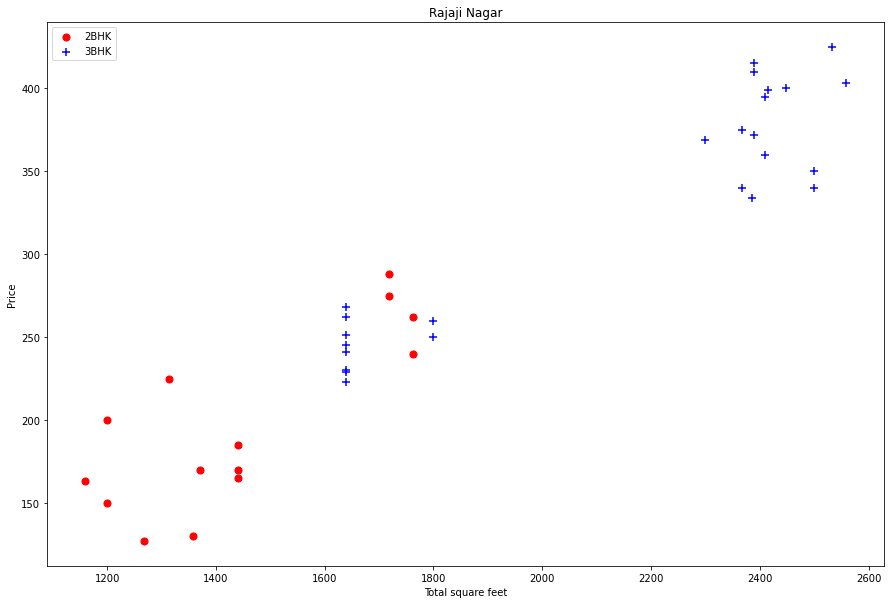

In [45]:
scatter_plot(data8, "Rajaji Nagar")

**By comparing both the plots, after removing the outliers most of the outlier data points have been removed, i.e, the 3BHK properties that are less than 2BHK properties have been removed.**

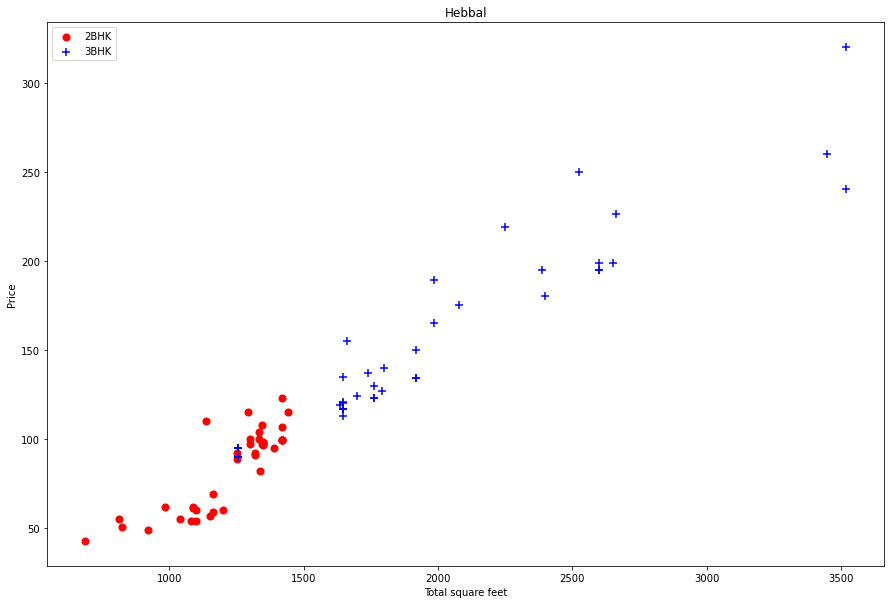

In [46]:
scatter_plot(data8, "Hebbal")

Text(0, 0.5, 'Count')

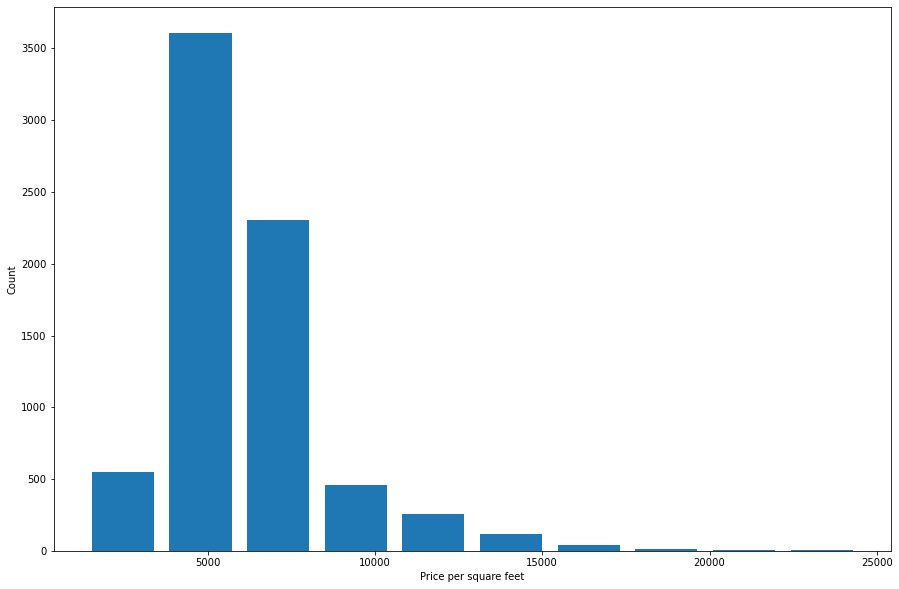

In [47]:
plt.hist(data8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

**Visualising number of data points present for price per square feet. Most of the data points are present from 1000 to 10000 price per square feet.** 

**Analysing the column 'bath'.**

In [48]:
data8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8530,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8619,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9352,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9683,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Counts')

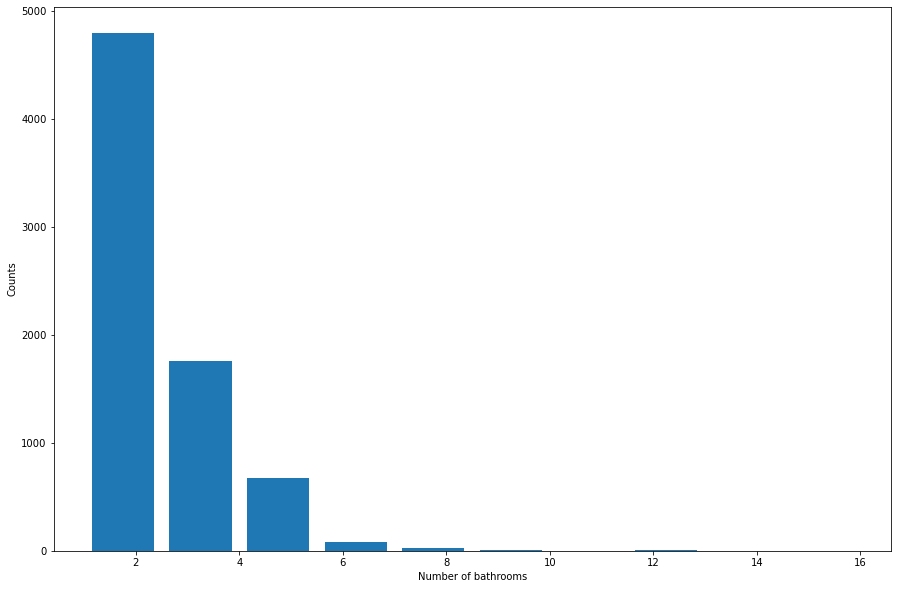

In [50]:
plt.hist(data8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Counts")

**Most of the properties present in the dataset has 2 bathrooms.**

**Looking for the properties which has the number of bathrooms more than the number of bedrooms.** 

In [51]:
data8[data8.bath>data8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**These above samples can be removed.** 

In [52]:
data9 = data8.copy()
print("Before cleaning ",data9.shape)

data9 = data8[~(data8.bath>data8.BHK+2)]
print("After cleaning ",data9.shape)

Before cleaning  (7353, 7)
After cleaning  (7349, 7)


In [53]:
data10 = data9.drop(['size','price_per_sqft'],axis = 'columns')
data10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


### **One Hot Encoding**

**Encoding the location categorical variable into numeric using One Hot Encoding. Using pandas dummies method, new column will be created for each of the location and '1' will be assigned to a particular location and '0' to the remaining locations.**   

In [54]:
encoding = pd.get_dummies(data10.location)
encoding

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Concating the original dataframe with dummy dataframe.**

In [55]:
data11 = pd.concat([data10, encoding], axis = 'columns')
data11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data12 = data11.drop(['price','location','other'], axis = 'columns')
data12

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10278,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10281,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10282,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X = data12
y = data11.price

In [58]:
print("The independent variable 'X'")
X.head()

The independent variable 'X'


,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print("The dependent variable 'y' is 'price'")
y.head()

The dependent variable 'y' is 'price'


0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

## **Spliting the dataset**

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
print("The shape of X_train : ", X_train.shape)
print("The shape of X_test : ", X_test.shape)
print("The shape of y_train : ",y_train.shape)
print("The shape of y_test : ",y_test.shape)

The shape of X_train :  (5879, 244)
The shape of X_test :  (1470, 244)
The shape of y_train :  (5879,)
The shape of y_test :  (1470,)


## **Model Building**

### **Linear Regression**

In [61]:
from sklearn.linear_model import LinearRegression
linear_classifier = LinearRegression()
linear_classifier.fit(X_train,y_train)
print("Accuracy of the Linear Regression : ")
linear_classifier.score(X_test, y_test)

Accuracy of the Linear Regression : 


0.8827001510195903

### **Cross Validation**

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
print("5 Fold cross validation score : ")
cross_val_score(LinearRegression(), X,y, cv=cv)

5 Fold cross validation score : 


array([0.84443886, 0.84981764, 0.80219542, 0.78645999, 0.83128416])

### **GridSearchCV Method**

**Experimenting with different models before selecting the final appropriate final model. Using GridSearchCV, tuning hyperparameters for different models and finding the best parameters for the best model.**

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def gridsearchcv(X,y):
    algorithms = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
            
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo, config in algorithms.items():
        gridsearch = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gridsearch.fit(X,y)
        scores.append({
            'models' : algo,
            'best_score' : gridsearch.best_score_,
            'best_params' : gridsearch.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['models','best_score','best_params'])

In [64]:
gridsearchcv(X,y)

,models,best_score,best_params
0,linear_regression,0.822839,{'normalize': False}
1,lasso,0.694094,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.708101,"{'criterion': 'mse', 'splitter': 'random'}"


**Predicting the price for the properties given the location, square feet, number of bathrooms and number of bedrooms. Location index is stored in the 'location_index' variable. And predicting the price using the Linear regression classifier.**

In [73]:
def predict_price(location, sqft, bath, bhk):
    location_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if location_index >= 0:
        x[location_index] = 1
        
    return linear_classifier.predict([x])[0]

In [74]:
predict_price('1st Phase JP Nagar', 1000, 2, 3)

81.2398716191009

In [77]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

84.86528731295034

In [75]:
predict_price('Rajaji Nagar', 1549, 2, 2)

270.8070574834927

In [76]:
predict_price('Rajaji Nagar', 1000, 2, 3)

223.48962715342634

**Saving the model using pickle.**

In [78]:
import pickle
with open('Bangalore_house_price_prediction.pickle', 'wb') as f:
    pickle.dump(linear_classifier, f)

**Saving the columns names in a json file.**

In [79]:
import json
columns = {
    'data columns' : [col.lower() for col in X.columns]
    }
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

## Model Deployment

**Final step after model building is deploying the model. For the backend Python Flask server is created and for the frontend  Website is created using html, css and javascript.**

**Below screenshot shows the Website created and that gets inputs from the user such as 'Area', 'Number of bedrooms', 'Number of bathrooms' and the location. The model predicts the value for the specified property.**

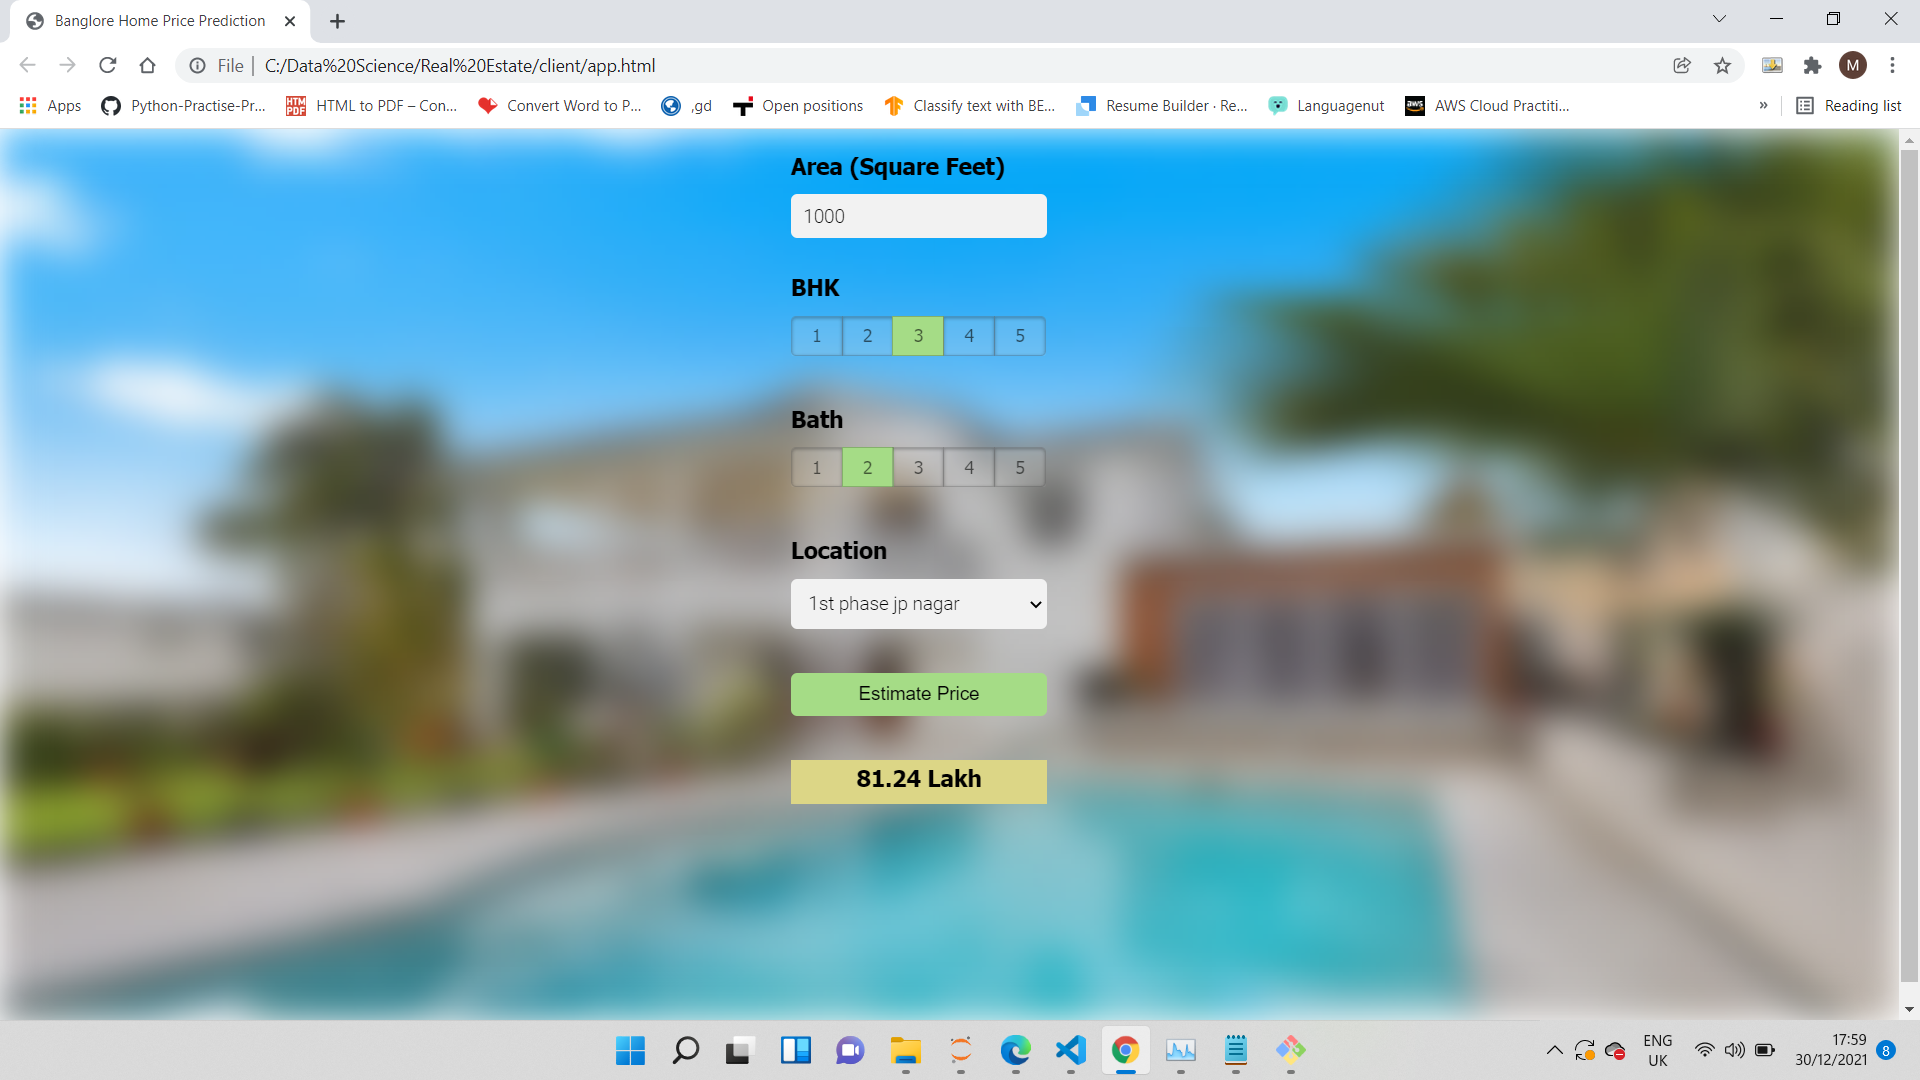

## Model deployment using NGNIX Web Server

**Below screenshot shows the model deployed in the NGNIX web server.**

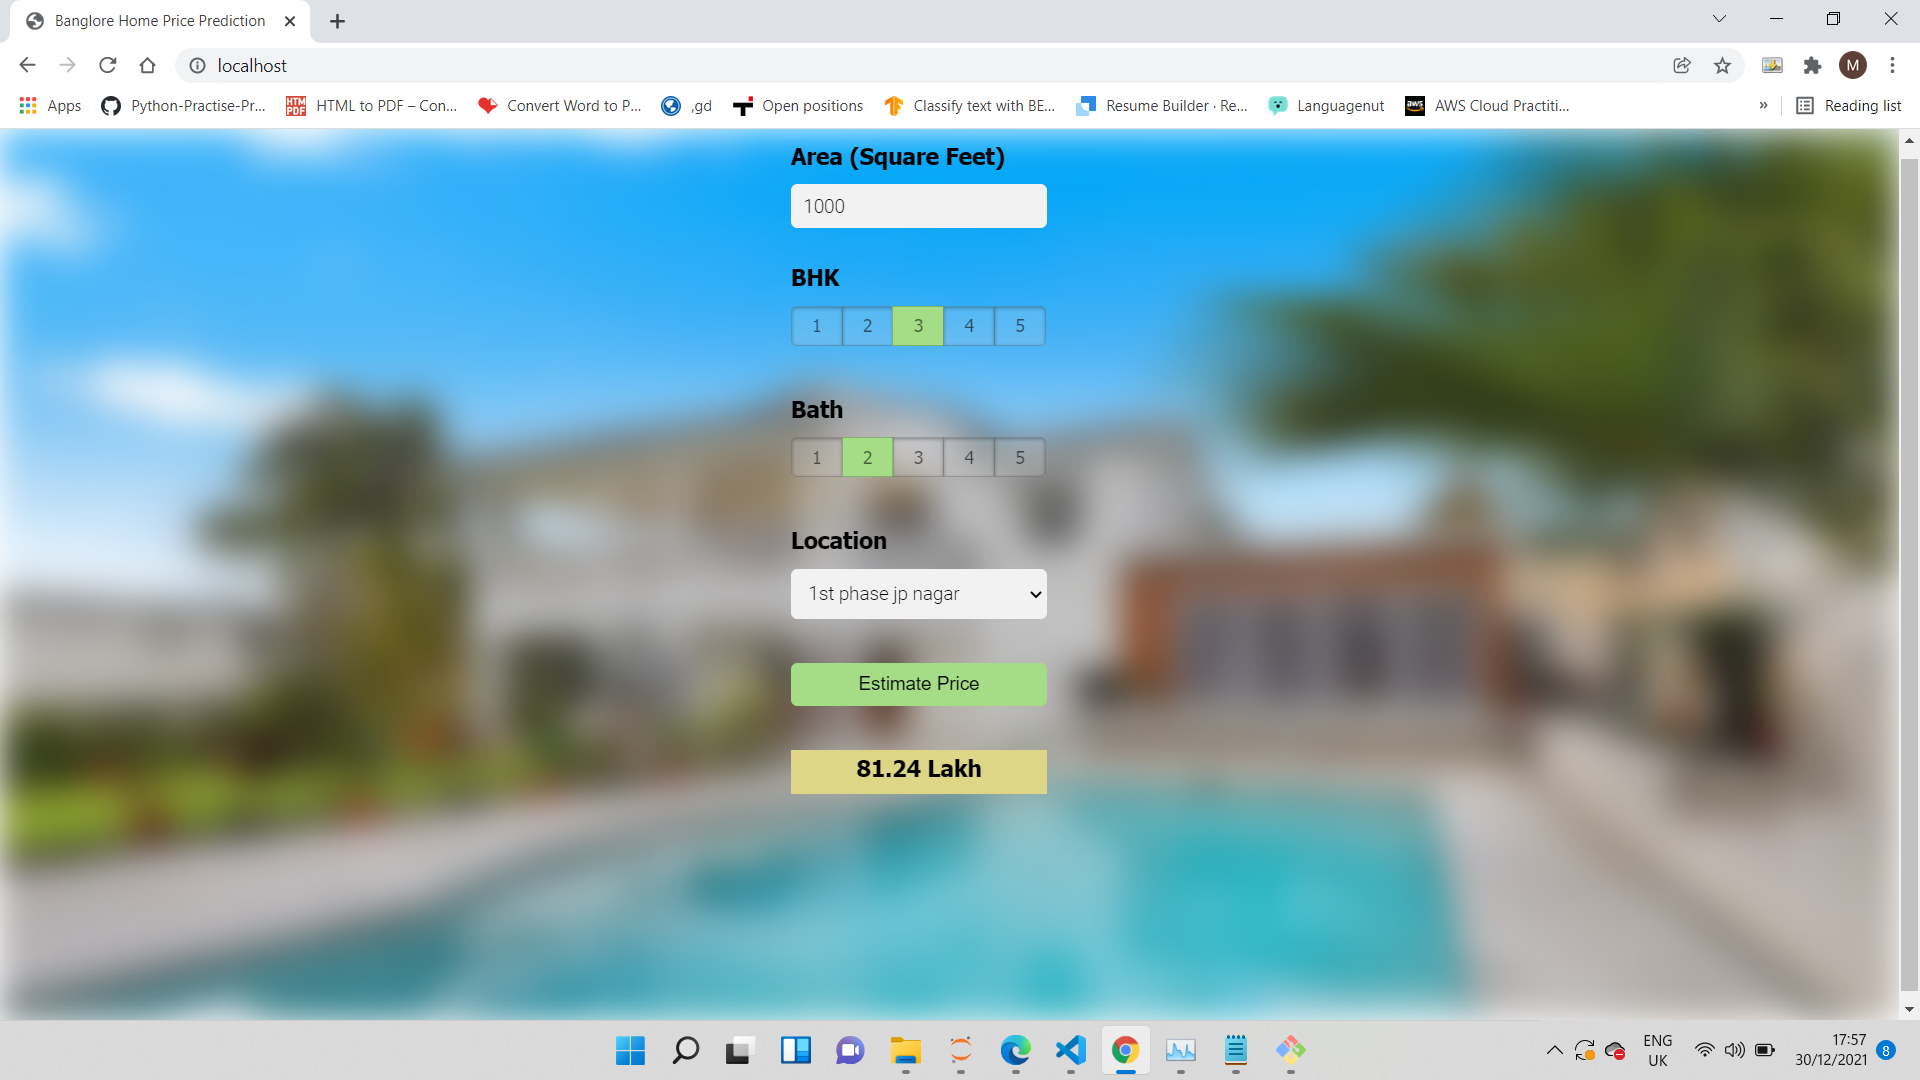

## Postman Collection

**Below screenschot explains the Postman collections used for testing the request get_location_names using the 'GET' method and the response is the locations.**

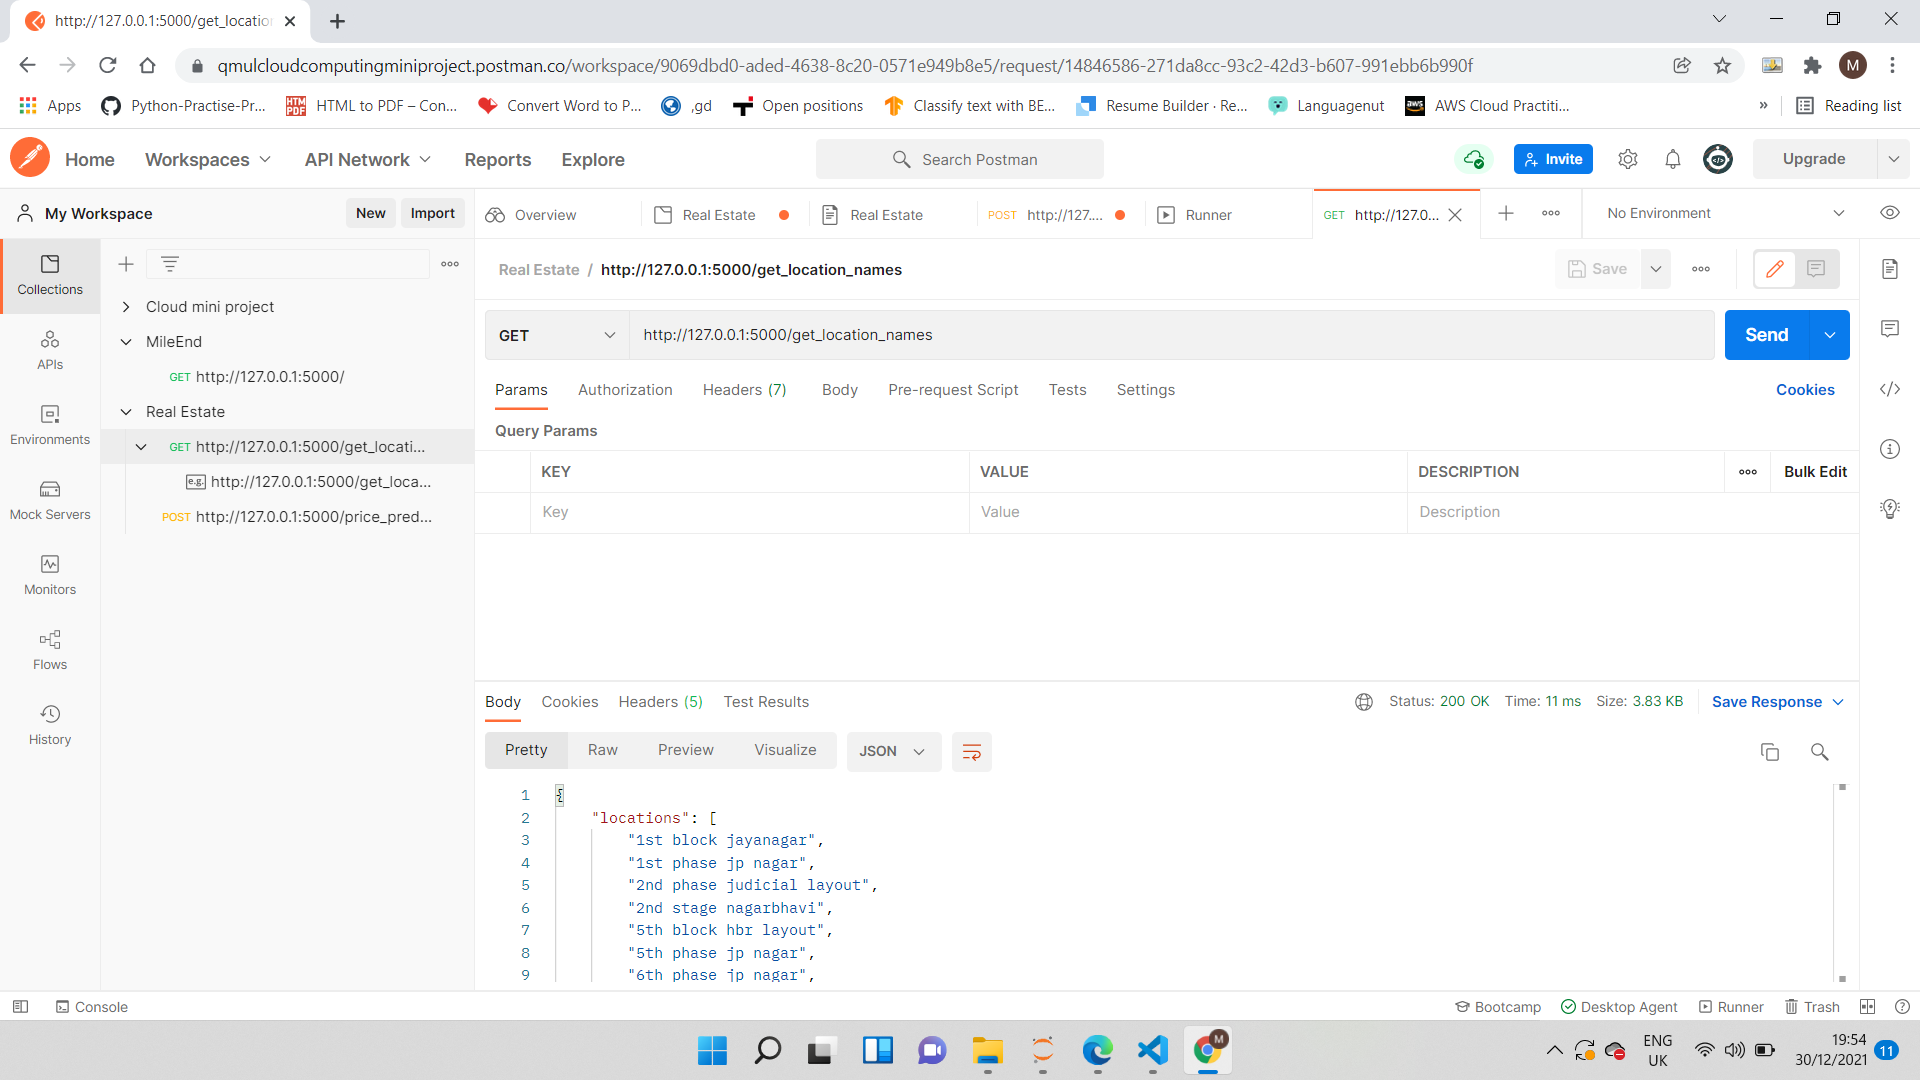

**Below screenshot shows the request price_prediction that provides the estimated value for the specified property given in the 'Body'.**

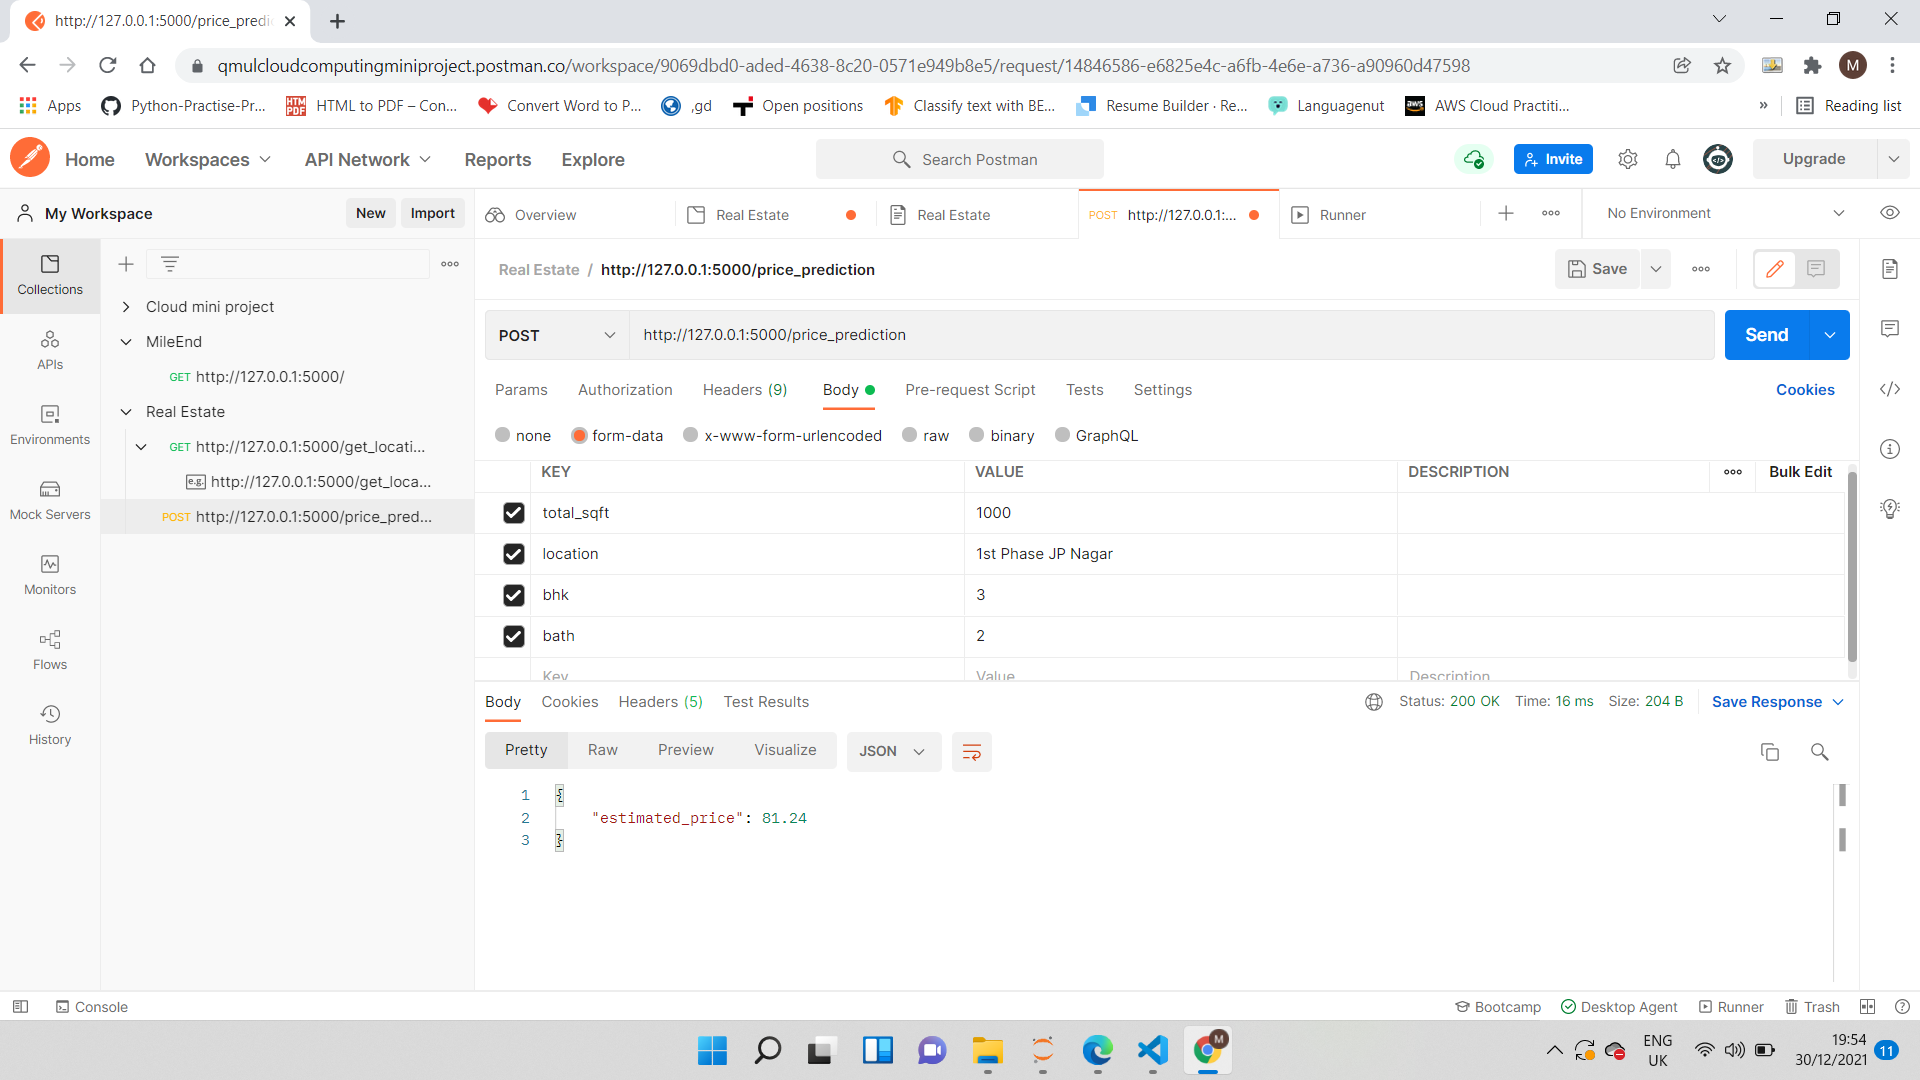